In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from ptlpinns.odes import numerical, equations
import torch

## Equation parameters

In [69]:
alpha = 0.2
x0, y0 = 1.5, 0.92
t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 512)

## Lotka-Volterra RK45 solution

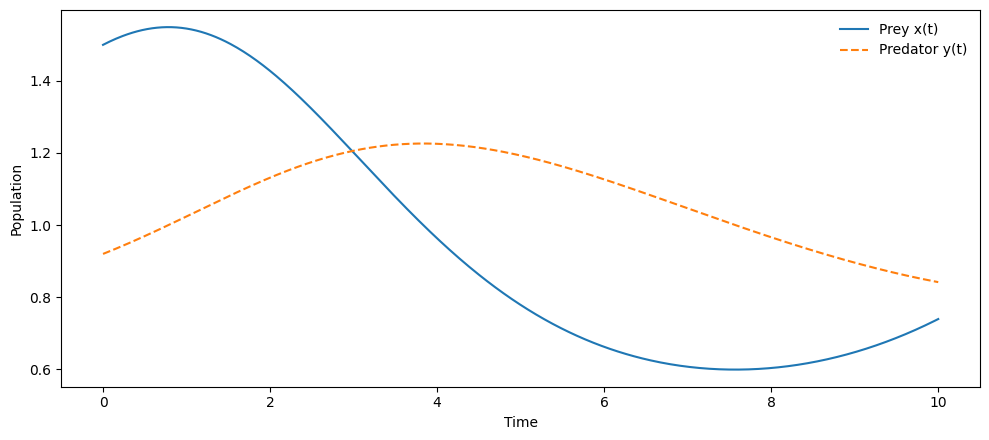

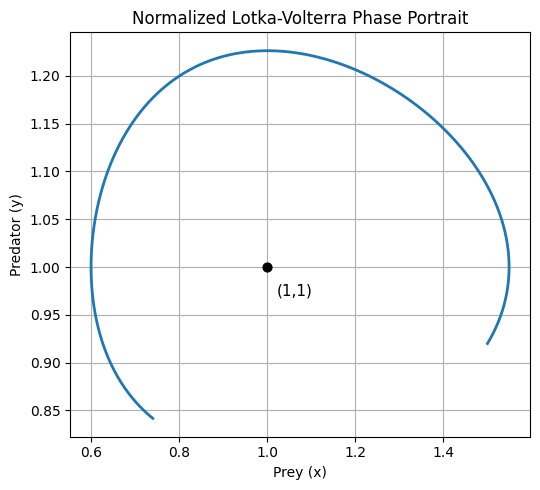

In [70]:
ode = equations.lv_normalized(alpha)

sol = numerical.solve_ode_equation(ode, t_span, t_eval, [x0, y0])
x, y = sol  # unpack solution components


plt.figure(figsize=(10, 4.5))
plt.plot(t_eval, x, label="Prey x(t)")
plt.plot(t_eval, y, '--', label="Predator y(t)")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend(frameon=False)
plt.tight_layout()

plt.figure(figsize=(5.5, 5.0))
plt.plot(x, y, lw=2)
plt.scatter([1], [1], s=40, zorder=5, color="k")
plt.text(1.02, 0.97, "(1,1)", fontsize=11)
plt.xlabel("Prey (x)")
plt.ylabel("Predator (y)")
plt.title("Normalized Lotka-Volterra Phase Portrait")
plt.grid(True)
plt.tight_layout()
plt.show()


## Perturbation solution

In [71]:
epsilon = 0.1
xi0 = (x0 - 1) / epsilon
eta0 = (y0 - 1) / epsilon
w_0 = np.sqrt(alpha)

### 0th-order solution

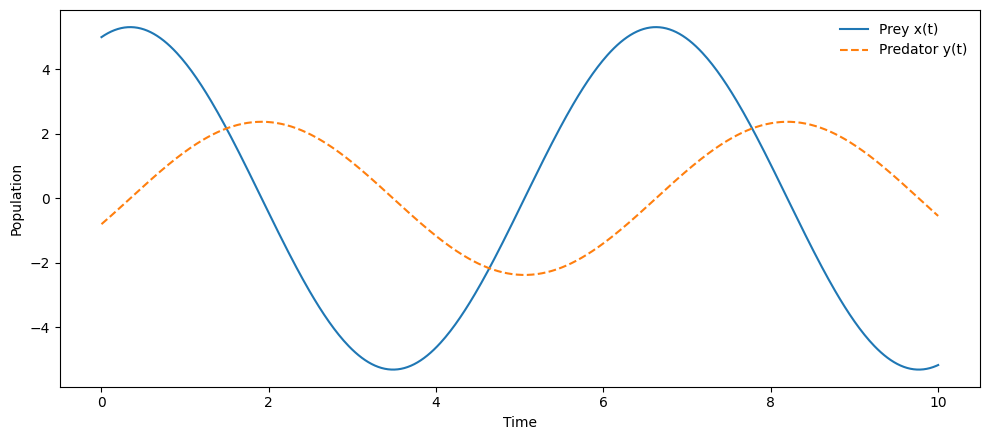

In [ ]:
def lv_0th_order(alpha):

    def lv(t, z):
        x, y = z
        dx = - y
        dy = alpha * x
        return [dx / np.sqrt(alpha), dy / np.sqrt(alpha)]

    return lv

correction_0 = numerical.solve_ode_equation(lv_0th_order(alpha), t_span, t_eval, [xi0, eta0])
xi_0, eta_0 = correction_0

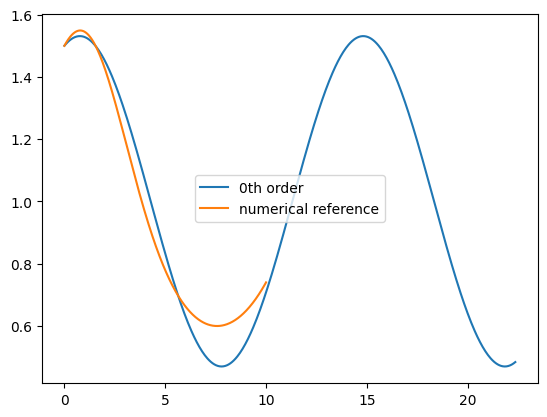

In [ ]:
# don't forget xi_0 is defined in tau!
plt.plot(t_eval / np.sqrt(alpha), 1 + epsilon * xi_0, label="0th order")
plt.plot(t_eval, x, label="numerical reference")
plt.legend()

### LKV Functions

In [ ]:
def calc_A(N: int, x_ddot: List, w_list: List)-> List:
    """
    Calculates A(x_{0}, ..., x_{N-1}, w_{0}, ..., w_{N - 1})

    Returns
        np.ndarray: Numpy array with A's values
    """

    lib = np if type(x_ddot[0]) == np.ndarray else torch
    A_term = lib.zeros_like(x_ddot[0])
    for k in range(1, N + 1): # ddot_x_N can't be calculated
        x_ddot_nk = x_ddot[N - k]
        for i in range(k + 1):
            if i == N or (k - i) == N: # 2 w_0 * w_N * ddot x_0 can't be calculated
                continue
            A_term += x_ddot_nk * w_list[i] * w_list[k - i] 

    return A_term

In [ ]:
def calc_w_n(w_list, xi, xi_dot, eta, t_eval, power):

    lib = np if type(x[0]) == np.ndarray else torch

    mask    = (t_eval >= 0) & (t_eval <= 2*lib.pi)
    t_seg   = t_eval[mask]    

    xi_seg = [term[mask] for term in xi]
    eta_seg = [term[mask] for term in eta] 


    B = calc_B(N=len(x_ddot), x_ddot = x_ddot_seg, x = x_seg, w_list=w_list, power=power)
    K = - xi_dot[0]

    num = lib.trapezoid(B * (eta[0]), x=t_seg)
    den = lib.trapezoid(K * (eta[0]), x=t_seg)

    w_n = num / den

    return w_n

### Solving higher-orders

In [ ]:
n_corrections = 10

for p in range(1, n_corrections + 1):

    print(f"calculating term p: {p}")
    w_n = calc_w_n(w_list=w_sol, x=x_lin, x_ddot=ddot_x_lin, t=t_eval)
    print(f"omega {p}: {w_n}")

    x_n_forcing = LP.calculate_forcing(w_n=w_n, w_list=w_sol, x=x_lin, x_ddot=ddot_x_lin)

    # defining forcing array as a function
    x_n_forcing_interp = CubicSpline(t_eval, x_n_forcing)

    if p == 1:
        def ode_x_n_(t, y):
            return np.array([y[1], - (w_0 ** 2) * y[0] + x_n_forcing_interp(t) + 1/epsilon * forcing(t)])
    else:
        def ode_x_n(t, y):
            return np.array([y[1], - (w_0 ** 2) * y[0] + x_n_forcing_interp(t)])

    # solving x_n ode
    x_n_lin = (numerical.solve_ode_equation(ode_x_n, t_span, t_eval, np.array([0,0])))[0]   


    w_sol.append(w_n)
    x_lin.append(x_n_lin)
    ddot_x_lin.append(np.gradient(np.gradient(x_n_lin, t_eval), t_eval))

SyntaxError: expected ':' (1637482669.py, line 3)